In [1]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 705.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 13.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing ins

In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [3]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [4]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
    
# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.3447065353393555s
[INFO] At 1000 files
[INFO] 1454 files found in 0.6746294498443604s
[INFO] At 1000 files
[INFO] 1452 files found in 0.638916015625s
[INFO] At 1000 files
[INFO] 1354 files found in 0.4443197250366211s
[INFO] At 1000 files
[INFO] 1342 files found in 0.4275319576263428s
[INFO] At 1000 files
[INFO] 1291 files found in 0.310077428817749s
[INFO] At 1000 files
[INFO] 1206 files found in 0.14607667922973633s
[INFO] At 1000 files
[INFO] 1194 files found in 0.11454987525939941s
[INFO] At 1000 files
[INFO] 1193 files found in 0.11146783828735352s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0034461021423339844s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 9s


In [7]:
len(train)

13811

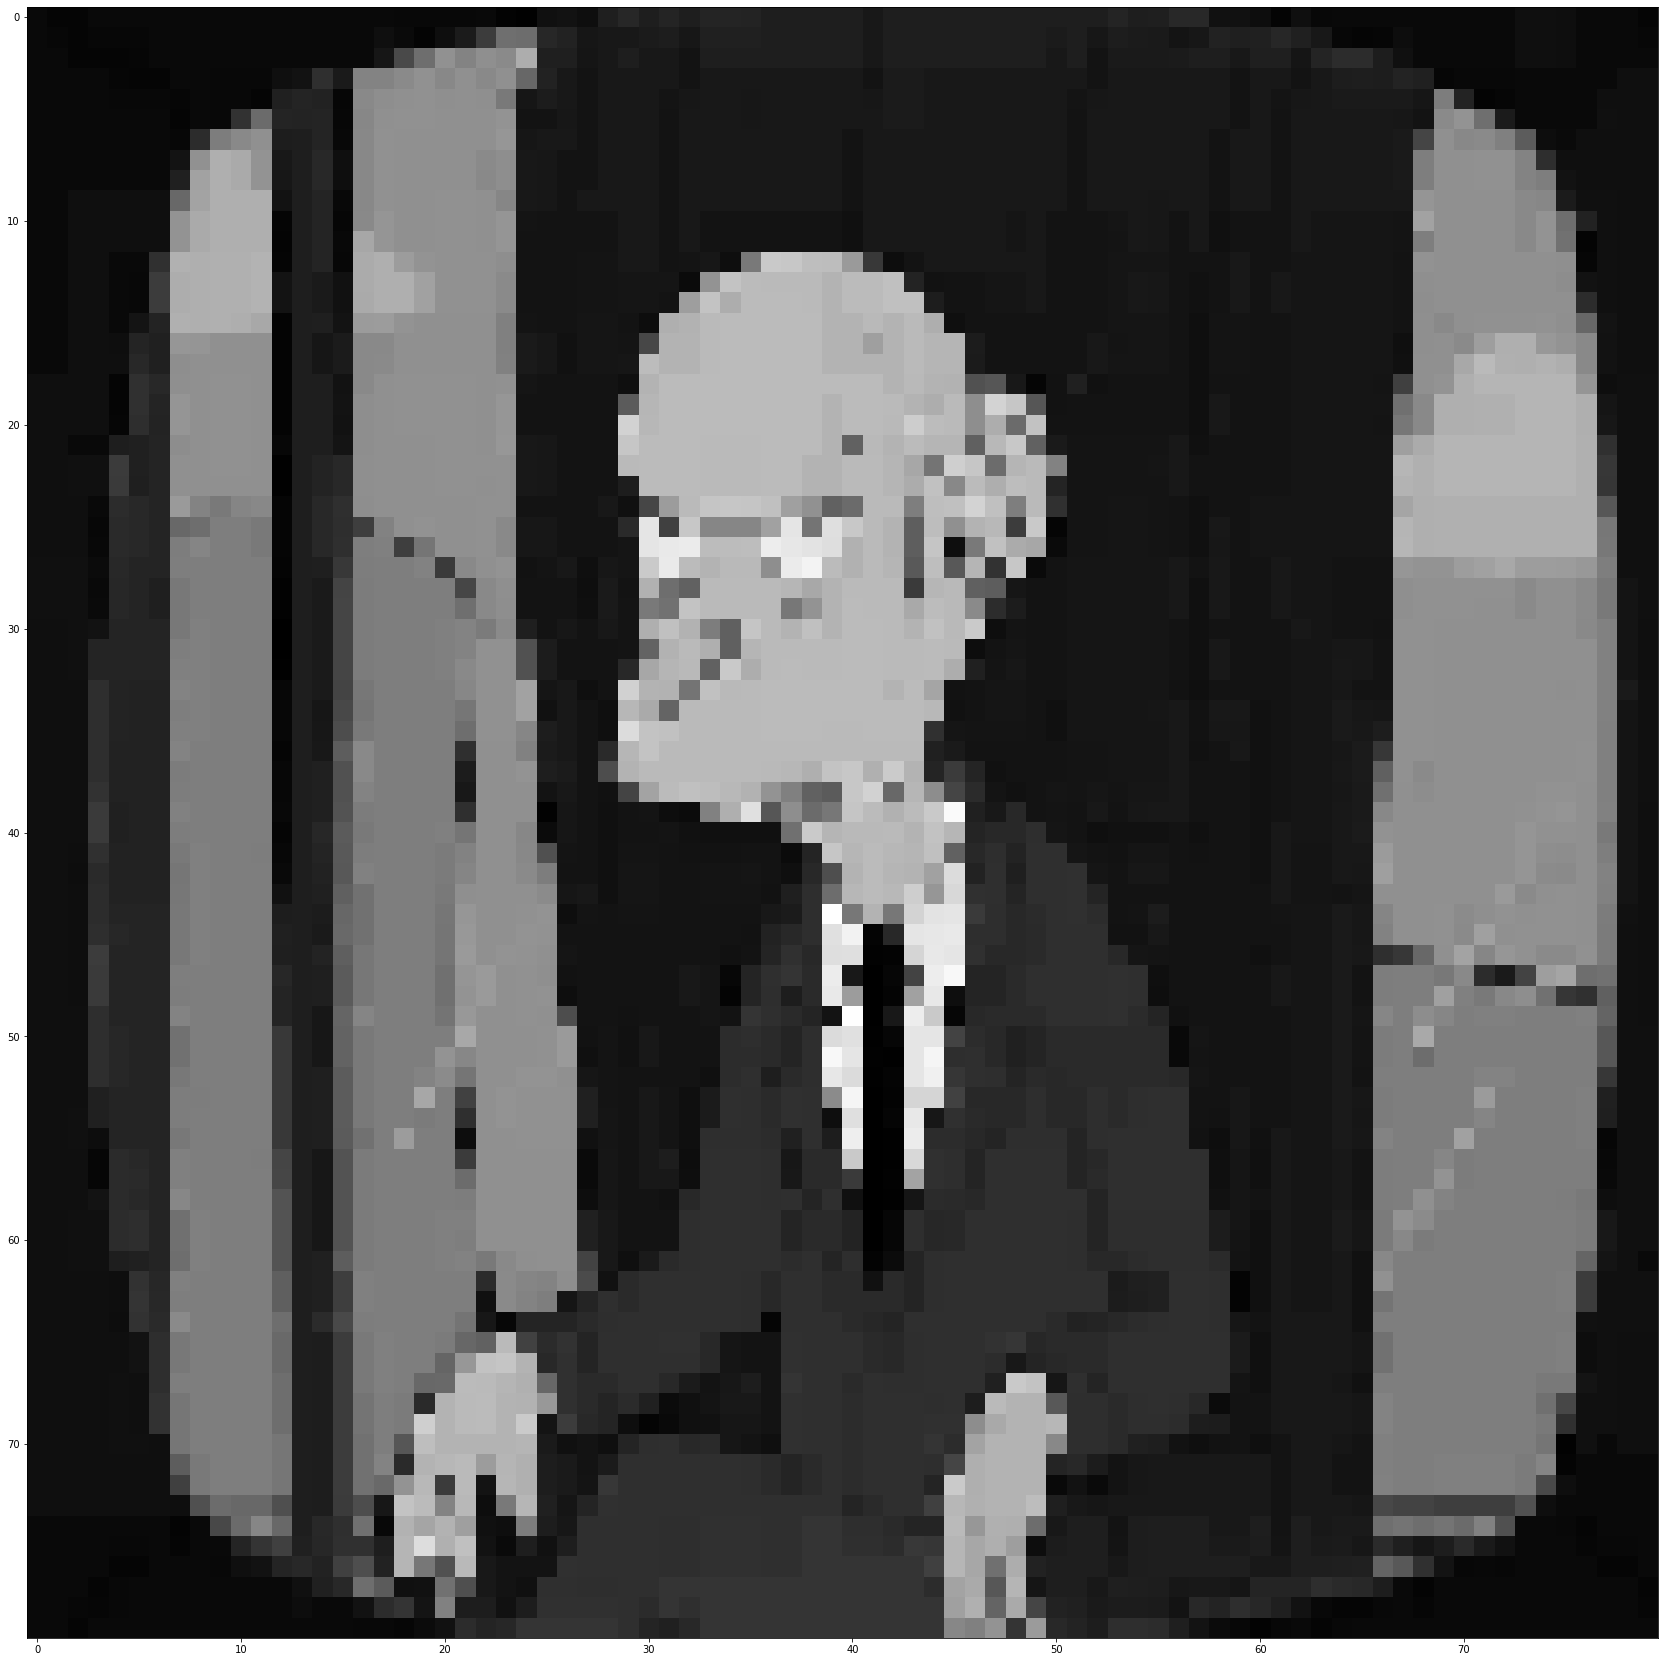

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap ='gray')
plt.show()

In [11]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [13]:
from tensorflow.keras.utils import to_categorical
# Normalize de featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [14]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [15]:
del train
del featureSet
del labels
gc.collect()

4344

In [16]:
BATCH_SIZE = 32
EPOCHS = 10

In [17]:
# Image data generator
datagen = canaro.generators.imageDataGenerator()
training_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [21]:
# Creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim = len(characters),
                                         loss='binary_crossentropy',decay=1e-6, learning_rate = 0.001,
                                         momentum=0.9, nesterov=True)

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 64)       

In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [28]:
training = model.fit(training_gen, 
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks=callbacks_list)

Epoch 1/10
345/345 [==============================] - 17s 30ms/step - loss: 0.3407 - accuracy: 0.1492 - val_loss: 0.3306 - val_accuracy: 0.1784
Epoch 2/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3241 - accuracy: 0.1564
Epoch 3/10
345/345 [==============================] - 9s 25ms/step - loss: 0.3235 - accuracy: 0.1568
Epoch 4/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3218 - accuracy: 0.1639
Epoch 5/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3129 - accuracy: 0.2044
Epoch 6/10
345/345 [==============================] - 8s 24ms/step - loss: 0.3058 - accuracy: 0.2330
Epoch 7/10
345/345 [==============================] - 8s 24ms/step - loss: 0.3024 - accuracy: 0.2498
Epoch 8/10
345/345 [==============================] - 9s 26ms/step - loss: 0.2998 - accuracy: 0.2688
Epoch 9/10
345/345 [==============================] - 9s 25ms/step - loss: 0.2967 - accuracy: 0.2785
Epoch 10/10
345/345 [===========================

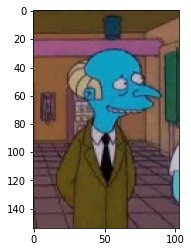

In [39]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'
img = cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()

In [40]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, 1)
    return img

In [41]:
predictions = model.predict(prepare(img))

In [37]:
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
print(characters[np.argmax(predictions[0])])

lisa_simpson
